I referenced alpop's code: https://github.com/alpop/Fish

This code runs from the 'Kaggle_Fisheries' directory. It assumes all JPG and JSON files are present under the 'train/' sub-folder.

Note the annotation files were provided by "shuai", and could be downloaded from:

* https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/discussion/25902

I actually verified/modified some of the annotations so that all resized bounding box sizes would fall into the optimal range for DetectNet, [50,50] to [400,400].

We can check/verify fish annotations with [sloth labeling tool](https://github.com/cvhciKIT/sloth), by executing the following shell command.

```shell
$ sloth train/ALB/ALB_labels.json
$ sloth train/BET/BET_labels.json
......
```

In [1]:
from PIL import Image
import os
import json

In [2]:
species = ['ALB','BET','DOL','LAG','NoF', 'OTHER','SHARK','YFT']
work_dir = './'
# os.chdir(work_dir)

In [3]:
im_widths   = []  # widths of the original images
im_heights  = []  # heights of the original images
box_widths  = []  # widths of the boudning boxes (as specified in the JSON files)
box_heights = []  # heights of the boudning boxes (as specified in the JSON files)

for spec in species:
    print('*** ' + spec + ' ***')
    input_dir = work_dir + 'train/' + spec + '/'
    json_file = spec +  '_labels.json'
    
    # Read json
    with open(input_dir+json_file) as json_data:
        d = json.load(json_data)
    
    for i in range(len(d)):
        # Record image sizes
        fn =  str(d[i]['filename'])    
        im = Image.open(os.path.join(input_dir,fn))
        print('{}: {}x{}'.format(fn,im.size[0],im.size[1]))
        im_widths.append(im.size[0])
        im_heights.append(im.size[1])
        
        # Also record all bounding box widths and heights
        for j in range(len(d[i]['annotations'])):
            box_widths.append(d[i]['annotations'][j]['width'])
            box_heights.append(d[i]['annotations'][j]['height'])

*** ALB ***
img_07917.jpg: 1280x720
img_07915.jpg: 1280x720
img_07914.jpg: 1280x750
img_07912.jpg: 1280x750
img_07904.jpg: 1280x720
img_07903.jpg: 1280x720
img_07892.jpg: 1280x720
img_07890.jpg: 1280x720
img_07885.jpg: 1280x750
img_07883.jpg: 1280x720
img_07879.jpg: 1280x720
img_07878.jpg: 1280x974
img_07877.jpg: 1280x720
img_07876.jpg: 1280x720
img_07874.jpg: 1280x720
img_07871.jpg: 1280x720
img_07869.jpg: 1276x718
img_07868.jpg: 1280x720
img_07863.jpg: 1280x720
img_07862.jpg: 1280x720
img_07858.jpg: 1280x720
img_07851.jpg: 1192x670
img_07850.jpg: 1280x720
img_07836.jpg: 1280x750
img_07826.jpg: 1280x750
img_07822.jpg: 1280x750
img_07814.jpg: 1280x720
img_07811.jpg: 1280x720
img_07810.jpg: 1280x720
img_07807.jpg: 1280x720
img_07802.jpg: 1280x720
img_07801.jpg: 1280x720
img_07797.jpg: 1280x720
img_07794.jpg: 1280x720
img_07789.jpg: 1280x750
img_07785.jpg: 1244x700
img_07773.jpg: 1280x750
img_07772.jpg: 1192x670
img_07771.jpg: 1280x720
img_07768.jpg: 1276x718
img_07767.jpg: 1280x720
img_

img_05518.jpg: 1276x718
img_05515.jpg: 1280x720
img_05512.jpg: 1280x720
img_05511.jpg: 1276x718
img_05510.jpg: 1280x720
img_05507.jpg: 1280x750
img_05501.jpg: 1280x720
img_05500.jpg: 1280x974
img_05494.jpg: 1280x720
img_05491.jpg: 1280x720
img_05482.jpg: 1280x720
img_05481.jpg: 1280x720
img_05480.jpg: 1280x750
img_05472.jpg: 1280x720
img_05465.jpg: 1280x720
img_05453.jpg: 1280x720
img_05443.jpg: 1280x720
img_05442.jpg: 1280x750
img_05419.jpg: 1276x718
img_05408.jpg: 1280x720
img_05397.jpg: 1280x720
img_05396.jpg: 1276x718
img_05390.jpg: 1276x718
img_05384.jpg: 1280x720
img_05383.jpg: 1280x720
img_05382.jpg: 1280x750
img_05376.jpg: 1280x720
img_05375.jpg: 1280x720
img_05373.jpg: 1280x924
img_05363.jpg: 1280x720
img_05358.jpg: 1280x720
img_05353.jpg: 1280x720
img_05350.jpg: 1192x670
img_05348.jpg: 1280x720
img_05343.jpg: 1280x720
img_05342.jpg: 1280x720
img_05332.jpg: 1192x670
img_05318.jpg: 1280x974
img_05315.jpg: 1280x750
img_05313.jpg: 1280x720
img_05312.jpg: 1280x720
img_05309.jpg: 1

img_01919.jpg: 1280x720
img_01917.jpg: 1280x720
img_01914.jpg: 1280x720
img_01911.jpg: 1280x750
img_01910.jpg: 1280x720
img_01909.jpg: 1280x720
img_01902.jpg: 1280x720
img_01901.jpg: 1280x720
img_01897.jpg: 1280x720
img_01896.jpg: 1280x720
img_01890.jpg: 1276x718
img_01884.jpg: 1280x720
img_01883.jpg: 1280x720
img_01878.jpg: 1280x720
img_01875.jpg: 1280x720
img_01869.jpg: 1192x670
img_01865.jpg: 1280x750
img_01858.jpg: 1192x670
img_01855.jpg: 1280x720
img_01846.jpg: 1280x750
img_01841.jpg: 1280x720
img_01838.jpg: 1280x750
img_01833.jpg: 1280x720
img_01830.jpg: 1280x720
img_01826.jpg: 1276x718
img_01823.jpg: 1276x718
img_01822.jpg: 1280x720
img_01819.jpg: 1280x720
img_01816.jpg: 1192x670
img_01810.jpg: 1280x750
img_01809.jpg: 1280x720
img_01806.jpg: 1280x720
img_01805.jpg: 1280x720
img_01804.jpg: 1280x720
img_01800.jpg: 1280x720
img_01797.jpg: 1280x720
img_01796.jpg: 1280x720
img_01790.jpg: 1280x720
img_01788.jpg: 1280x924
img_01786.jpg: 1276x718
img_01778.jpg: 1280x720
img_01772.jpg: 1

img_00456.jpg: 1280x720
img_00471.jpg: 1276x718
img_00481.jpg: 1192x670
img_00494.jpg: 1280x720
img_00504.jpg: 1280x750
img_00512.jpg: 1280x720
img_00516.jpg: 1280x750
img_00529.jpg: 1732x974
img_00553.jpg: 1280x750
img_00585.jpg: 1280x720
img_00586.jpg: 1280x720
img_00609.jpg: 1280x720
img_00615.jpg: 1280x750
img_00616.jpg: 1280x720
img_00645.jpg: 1280x720
img_00651.jpg: 1276x718
img_00658.jpg: 1276x718
img_00673.jpg: 1192x670
img_00681.jpg: 1280x720
img_00720.jpg: 1280x720
img_00725.jpg: 1280x720
img_00748.jpg: 1276x718
img_00766.jpg: 1276x718
img_00818.jpg: 1276x718
img_00819.jpg: 1280x750
img_00826.jpg: 1192x670
img_00847.jpg: 1280x720
img_00849.jpg: 1280x720
img_00887.jpg: 1280x720
img_00904.jpg: 1192x670
img_00910.jpg: 1280x720
img_00926.jpg: 1276x718
img_00949.jpg: 1280x720
img_00981.jpg: 1280x720
img_01005.jpg: 1732x974
img_01013.jpg: 1280x720
img_01017.jpg: 1280x720
img_01020.jpg: 1280x720
img_01024.jpg: 1280x720
img_01039.jpg: 1280x720
img_01040.jpg: 1280x720
img_01052.jpg: 1

img_07857.jpg: 1280x720
img_07841.jpg: 1280x720
img_07661.jpg: 1280x974
img_07556.jpg: 1280x720
img_07533.jpg: 1280x720
img_07498.jpg: 1280x750
img_07484.jpg: 1280x720
img_07473.jpg: 1280x974
img_07414.jpg: 1280x750
img_07392.jpg: 1280x720
img_07282.jpg: 1280x720
img_07221.jpg: 1280x720
img_07080.jpg: 1280x720
img_07056.jpg: 1280x974
img_07022.jpg: 1280x974
img_07003.jpg: 1280x974
img_06956.jpg: 1280x720
img_06913.jpg: 1280x720
img_06903.jpg: 1280x720
img_06881.jpg: 1280x974
img_06847.jpg: 1280x974
img_06821.jpg: 1280x720
img_06786.jpg: 1280x974
img_06686.jpg: 1280x720
img_06677.jpg: 1280x720
img_06595.jpg: 1280x720
img_06590.jpg: 1280x750
img_06537.jpg: 1280x720
img_06523.jpg: 1280x720
img_06493.jpg: 1280x720
img_06474.jpg: 1280x720
img_06467.jpg: 1280x720
img_06448.jpg: 1280x720
img_06444.jpg: 1280x750
img_06410.jpg: 1280x974
img_06385.jpg: 1280x750
img_06303.jpg: 1280x974
img_06220.jpg: 1280x974
img_06163.jpg: 1280x750
img_06124.jpg: 1280x720
img_06118.jpg: 1280x720
img_06082.jpg: 1

img_01368.jpg: 1280x720
img_01358.jpg: 1280x720
img_01346.jpg: 1280x974
img_01340.jpg: 1280x750
img_01335.jpg: 1280x974
img_01329.jpg: 1192x670
img_01323.jpg: 1280x750
img_01308.jpg: 1280x750
img_01301.jpg: 1280x974
img_01292.jpg: 1280x720
img_01270.jpg: 1280x974
img_01254.jpg: 1280x720
img_01241.jpg: 1280x750
img_01235.jpg: 1280x974
img_01233.jpg: 1280x720
img_01217.jpg: 1280x720
img_01201.jpg: 1280x720
img_01199.jpg: 1280x750
img_01190.jpg: 1280x974
img_01189.jpg: 1280x750
img_01174.jpg: 1280x974
img_01156.jpg: 1280x974
img_01143.jpg: 1280x720
img_01113.jpg: 1280x720
img_01087.jpg: 1280x974
img_01076.jpg: 1280x974
img_01064.jpg: 1280x974
img_01008.jpg: 1280x720
img_01007.jpg: 1280x924
img_00997.jpg: 1280x750
img_00969.jpg: 1280x720
img_00968.jpg: 1280x750
img_00958.jpg: 1280x720
img_00955.jpg: 1280x720
img_00945.jpg: 1280x974
img_00925.jpg: 1280x720
img_00916.jpg: 1280x720
img_00900.jpg: 1280x720
img_00896.jpg: 1280x974
img_00891.jpg: 1280x974
img_00890.jpg: 1280x924
img_00872.jpg: 1

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Draw histograms.

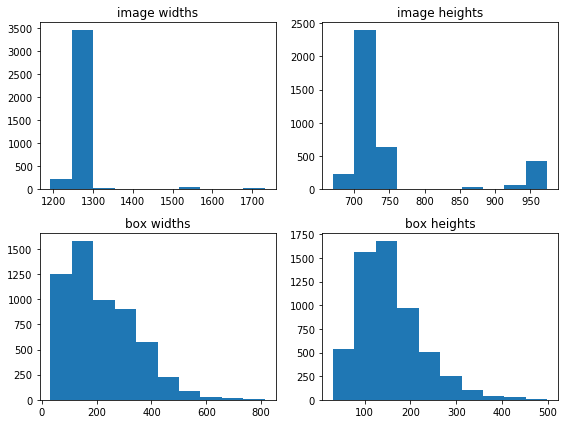

In [5]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.hist(np.array(im_widths))
plt.title('image widths')
plt.subplot(2, 2, 2)
plt.hist(np.array(im_heights))
plt.title('image heights')
plt.subplot(2, 2, 3)
plt.hist(np.array(box_widths))
plt.title('box widths')
plt.subplot(2, 2, 4)
plt.hist(np.array(box_heights))
plt.title('box heights')
plt.tight_layout()
plt.show()

min/max image widths  = 1732 / 1192
min/max image heights =  974 /  670


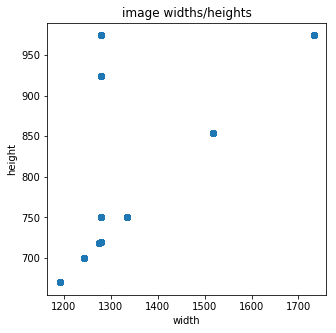

In [6]:
print('min/max image widths  = {0:4d} / {1:4d}'.format(
    max(im_widths),min(im_widths)))
print('min/max image heights = {0:4d} / {1:4d}'.format(
    max(im_heights),min(im_heights)))

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.scatter(np.array(im_widths),np.array(im_heights))
plt.title('image widths/heights')
plt.xlabel('width')
plt.ylabel('height')

plt.show()

Check out the maximum and minimum widths/heights of the boudning boxes.

Note that DetectNet works best for bounding boxes with size ranging from (50, 50) up to (400, 400).

min/max bounding box widths  = 813.7 / 30.9
min/max bounding box heights = 498.9 / 30.6


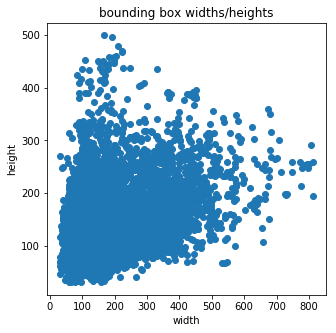

In [7]:
print('min/max bounding box widths  = {0:4.1f} / {1:4.1f}'.format(
    max(box_widths),min(box_widths)))
print('min/max bounding box heights = {0:4.1f} / {1:4.1f}'.format(
    max(box_heights),min(box_heights)))

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.scatter(np.array(box_widths),np.array(box_heights))
plt.title('bounding box widths/heights')
plt.xlabel('width')
plt.ylabel('height')

plt.show()